# Análise exploratória de dados do ENEM 2020
### O objetivo do projeto é entender o impacto das variáveis: UF da escola, idade, sexo, cor/raça, nota de matemática, nota em ciências humanas, disponibilidade de internet em casa, renda familiar mensal e escolaridade da mãe (‘Q002’), nas notas dos candidatos.



In [1]:
# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Para realização da análise foram importados os dados do ENEM 2020.
### https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem

In [2]:
# importando a base de dados para um dataframe
df = pd.read_csv("MICRODADOS_ENEM_2020.csv", delimiter=";",  encoding = "ISO-8859-1")

### Ao visualizarmos os dados, podemos observar a ausência (NaN) de alguns valores.

In [3]:
# visialisando a base
df.head(40)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,200006271946,2020,11,F,1,2,1,1,11,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,200001195856,2020,11,M,2,3,1,1,11,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,200001943954,2020,4,F,2,3,2,2,0,2,...,B,A,A,B,A,A,A,A,A,A
3,200001908998,2020,2,M,1,3,1,2,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,200001634757,2020,4,F,1,3,2,1,1,1,...,A,A,A,B,A,B,B,A,A,B
5,200003132410,2020,3,F,1,3,1,1,1,1,...,B,A,A,B,B,A,D,A,B,B
6,200001379770,2020,9,M,1,3,1,1,6,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,200001334237,2020,4,M,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,200006762554,2020,5,F,2,3,1,1,3,1,...,A,A,A,B,A,A,C,A,A,A
9,200005146210,2020,2,M,1,2,1,2,0,2,...,A,A,A,B,A,A,A,A,A,B


In [4]:
# Exibindo a quantidade de linhas e colunas
df.shape

(5783109, 76)

In [5]:
# exibindo o nome das colunas
df.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

### Como impacta diretamente nos cálculos referentes as notas, os dados ausentes (NaN) relacionados a ausência do candidato na realização das provas foram removidos. 

In [6]:
# exibindo os valores ausentes
df.isna().sum().sort_values(ascending=False).head(40)

TP_LOCALIZACAO_ESC        4878540
CO_UF_ESC                 4878540
TP_SIT_FUNC_ESC           4878540
TP_DEPENDENCIA_ADM_ESC    4878540
SG_UF_ESC                 4878540
CO_MUNICIPIO_ESC          4878540
NO_MUNICIPIO_ESC          4878540
TP_ENSINO                 4479663
NU_NOTA_CN                3185669
CO_PROVA_MT               3185669
CO_PROVA_CN               3185669
TX_RESPOSTAS_CN           3185669
TX_GABARITO_CN            3185669
NU_NOTA_MT                3185669
TX_RESPOSTAS_MT           3185669
TX_GABARITO_MT            3185669
TP_STATUS_REDACAO         3028969
NU_NOTA_CH                3028969
NU_NOTA_REDACAO           3028969
CO_PROVA_LC               3028969
CO_PROVA_CH               3028969
NU_NOTA_COMP5             3028969
NU_NOTA_COMP4             3028969
TX_RESPOSTAS_CH           3028969
TX_RESPOSTAS_LC           3028969
NU_NOTA_COMP3             3028969
TX_GABARITO_CH            3028969
TX_GABARITO_LC            3028969
NU_NOTA_COMP2             3028969
NU_NOTA_COMP1 

In [7]:
# Analizando os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783109 entries, 0 to 5783108
Data columns (total 76 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NU_INSCRICAO            int64  
 1   NU_ANO                  int64  
 2   TP_FAIXA_ETARIA         int64  
 3   TP_SEXO                 object 
 4   TP_ESTADO_CIVIL         int64  
 5   TP_COR_RACA             int64  
 6   TP_NACIONALIDADE        int64  
 7   TP_ST_CONCLUSAO         int64  
 8   TP_ANO_CONCLUIU         int64  
 9   TP_ESCOLA               int64  
 10  TP_ENSINO               float64
 11  IN_TREINEIRO            int64  
 12  CO_MUNICIPIO_ESC        float64
 13  NO_MUNICIPIO_ESC        object 
 14  CO_UF_ESC               float64
 15  SG_UF_ESC               object 
 16  TP_DEPENDENCIA_ADM_ESC  float64
 17  TP_LOCALIZACAO_ESC      float64
 18  TP_SIT_FUNC_ESC         float64
 19  CO_MUNICIPIO_PROVA      int64  
 20  NO_MUNICIPIO_PROVA      object 
 21  CO_UF_PROVA             int64  

In [8]:
# removendo as linhas das dos caditados que não possuem notas das provas
df.dropna(subset=['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO'], inplace=True)

In [9]:
# Observando o impacto da remoção das linha com notas ausentes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2588681 entries, 1 to 5783108
Data columns (total 76 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NU_INSCRICAO            int64  
 1   NU_ANO                  int64  
 2   TP_FAIXA_ETARIA         int64  
 3   TP_SEXO                 object 
 4   TP_ESTADO_CIVIL         int64  
 5   TP_COR_RACA             int64  
 6   TP_NACIONALIDADE        int64  
 7   TP_ST_CONCLUSAO         int64  
 8   TP_ANO_CONCLUIU         int64  
 9   TP_ESCOLA               int64  
 10  TP_ENSINO               float64
 11  IN_TREINEIRO            int64  
 12  CO_MUNICIPIO_ESC        float64
 13  NO_MUNICIPIO_ESC        object 
 14  CO_UF_ESC               float64
 15  SG_UF_ESC               object 
 16  TP_DEPENDENCIA_ADM_ESC  float64
 17  TP_LOCALIZACAO_ESC      float64
 18  TP_SIT_FUNC_ESC         float64
 19  CO_MUNICIPIO_PROVA      int64  
 20  NO_MUNICIPIO_PROVA      object 
 21  CO_UF_PROVA             int64  

In [10]:
# exibindo os valores ausentes
df.isna().sum().sort_values(ascending=False).head(40)

TP_SIT_FUNC_ESC           2050772
TP_LOCALIZACAO_ESC        2050772
TP_DEPENDENCIA_ADM_ESC    2050772
SG_UF_ESC                 2050772
CO_UF_ESC                 2050772
NO_MUNICIPIO_ESC          2050772
CO_MUNICIPIO_ESC          2050772
TP_ENSINO                 1798573
Q009                        27377
Q010                        27377
Q025                        27377
Q012                        27377
Q008                        27377
Q007                        27377
Q006                        27377
Q005                        27377
Q004                        27377
Q003                        27377
Q002                        27377
Q001                        27377
Q011                        27377
Q013                        27377
Q023                        27377
Q015                        27377
Q016                        27377
Q017                        27377
Q018                        27377
Q019                        27377
Q020                        27377
Q021          

### Para facilitar a visualização nos gráficos, alguns valores foram tranformados de acordo com o Dicionário_Microdados_Enem_2020.

In [11]:
# Cor/raça
df['TP_COR_RACA'] = df['TP_COR_RACA'].map({0:'NA', 1:'Branca', 2:'Preta', 3:'Parda', 4:'Amarela', 5:'Indigena'})

In [12]:
df['TP_COR_RACA'].head()

1     Parda
3     Parda
5     Parda
7    Branca
8     Parda
Name: TP_COR_RACA, dtype: object

In [13]:
# Na sua residência tem acesso à Internet?
df['Q025'] = df['Q025'].map({'A':'Não', 'B':'Sim'})

In [14]:
df['Q025'].head()

1    NaN
3    NaN
5    Sim
7    NaN
8    Não
Name: Q025, dtype: object

In [15]:
# Até que série seu pai, ou o homem responsável por você, estudou?
df['Q001'] = df['Q001'].map({
                            'A':'Nunca estudou', 
                            'B':'Não completou EF', 
                            'C':'Não completou EF',
                            'D':'Não completou EM', 
                            'E':'Não completou ES', 
                            'F':'Graduada',
                            'G':'Pós-graduada',
                            'H':'Não sabe'
                            })

In [16]:
df['Q001'].head()

1                 NaN
3                 NaN
5    Não completou EF
7                 NaN
8    Não completou EF
Name: Q001, dtype: object

In [17]:
# Até que série sua mãe, ou a mulher responsável por você, estudou?
df['Q002'] = df['Q002'].map({
                            'A':'Nunca estudou', 
                            'B':'Não completou EF', 
                            'C':'Não completou EF',
                            'D':'Não completou EM', 
                            'E':'Não completou ES', 
                            'F':'Graduada',
                            'G':'Pós-graduada',
                            'H':'Não sabe'
                            })

In [18]:
df['Q002'].head()

1                 NaN
3                 NaN
5    Não completou EF
7                 NaN
8    Não completou EF
Name: Q002, dtype: object

In [19]:
# Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)
df['Q006'] = df['Q006'].map({'A':'Nenhuma renda',
                            'B':'Até 1.045,00',
                            'C':'Até 1.567,50',
                            'D':'Até 2.090,00',
                            'E':'Até 2.612,50',
                            'F':'Até 3.135,00',
                            'G':'Até 4.180,00',
                            'H':'Até 5.225,00',
                            'I':'Até 6.270,00',
                            'J':'Até 7.315,00',
                            'K':'Até 8.360,00',
                            'L':'Até 9.405,00',
                            'M':'Até 10.450,00',
                            'N':'Até 12.540,00',
                            'O':'Até 15.675,00',
                            'P':'Até 20.900,00',
                            'Q':'Acima de 20.900,00'})


In [20]:
df['Q006'].head()

1             NaN
3             NaN
5    Até 1.567,50
7             NaN
8    Até 1.045,00
Name: Q006, dtype: object

In [21]:
# Faixa etária
df['TP_FAIXA_ETARIA'] = df['TP_FAIXA_ETARIA'].map({
                                                    1:'Menor de 17 anos',
                                                    2:'17 anos',
                                                    3:'18 anos',
                                                    4:'19 anos',
                                                    5:'20 anos',
                                                    6:'21 anos',
                                                    7:'22 anos',
                                                    8:'23 anos',
                                                    9:'24 anos',
                                                    10:'25 anos',
                                                    11:'Entre 26 e 30 anos',
                                                    12:'Entre 31 e 35 anos',
                                                    13:'Entre 36 e 40 anos',
                                                    14:'Entre 41 e 45 anos',
                                                    15:'Entre 46 e 50 anos',
                                                    16:'Entre 51 e 55 anos',
                                                    17:'Entre 56 e 60 anos',
                                                    18:'Entre 61 e 65 anos',
                                                    19:'Entre 66 e 70 anos',
                                                    20:'Maior de 70 anos'})


In [22]:
df['TP_FAIXA_ETARIA'].head()

1    Entre 26 e 30 anos
3               17 anos
5               18 anos
7               19 anos
8               20 anos
Name: TP_FAIXA_ETARIA, dtype: object

#### Como podemos constatar na base de dados, a maiora dos inscritos são do sexo feminino. E a maioria por etnia, são de pretos e pardos somados, totalizando aproximadamente 57%.

In [23]:
#porcentagem de cada sexo na amostra
df['TP_SEXO'].value_counts()/df.shape[0]*100

F    60.418839
M    39.581161
Name: TP_SEXO, dtype: float64

In [24]:
#porcentagem de cada etnia na amostra
df['TP_COR_RACA'].value_counts()/df.shape[0]*100

Parda       45.170919
Branca      38.035625
Preta       12.103268
Amarela      2.219238
NA           1.931486
Indigena     0.539464
Name: TP_COR_RACA, dtype: float64

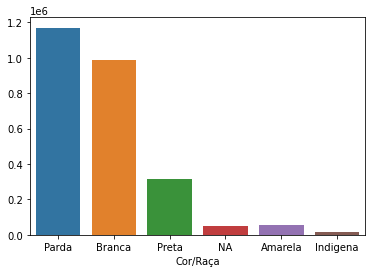

In [25]:
sns.countplot(x = df['TP_COR_RACA'])
plt.xlabel('Cor/Raça')
plt.ylabel("")
plt.show()

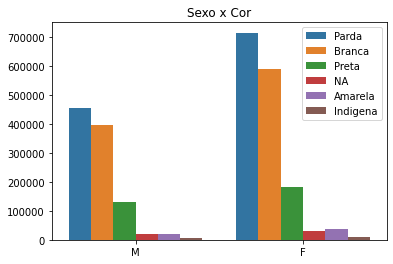

In [26]:
sns.countplot(x = df['TP_SEXO'], hue=df['TP_COR_RACA'], dodge=True)
plt.title('Sexo x Cor')
plt.xlabel('')
plt.ylabel("")
plt.legend(loc='best')
plt.show()

#### Podemos observar também que a maioria dos inscritos ficam em São Paulo.

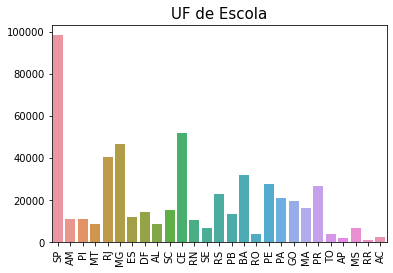

In [27]:
sns.countplot(x = df['SG_UF_ESC'], orient='h')
plt.title('UF de Escola', size=15)
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("")
plt.show()

In [28]:
#Possui internet em casa?
df['Q025'].value_counts()/df.shape[0]*100

Sim    83.068057
Não    15.874378
Name: Q025, dtype: float64

In [29]:
#Escolaridade da mãe
df['Q002'].value_counts()/df.shape[0]*100

Não completou ES    34.052013
Não completou EF    25.677401
Graduada            12.069313
Não completou EM    11.393795
Pós-graduada        10.627343
Nunca estudou        2.948876
Não sabe             2.173694
Name: Q002, dtype: float64

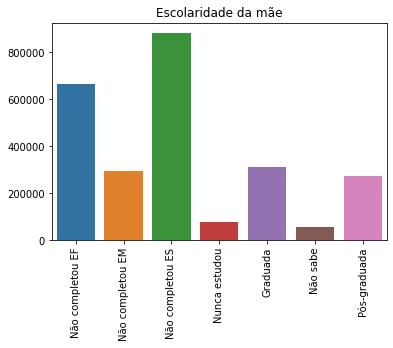

In [30]:
sns.countplot(x = df['Q002'])
plt.title('Escolaridade da mãe')
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("")
plt.show()

In [31]:
#Renda da familia, incluindo a do aluno
df['Q006'].value_counts()/df.shape[0]*100

Até 1.045,00          29.301795
Até 1.567,50          16.299845
Até 2.090,00          12.143288
Até 3.135,00           7.045905
Nenhuma renda          6.597143
Até 2.612,50           6.270027
Até 4.180,00           5.536874
Até 5.225,00           4.025100
Até 6.270,00           2.457390
Até 7.315,00           1.495549
Acima de 20.900,00     1.220004
Até 10.450,00          1.219810
Até 8.360,00           1.178670
Até 12.540,00          1.165304
Até 15.675,00          1.060115
Até 20.900,00          1.029096
Até 9.405,00           0.896518
Name: Q006, dtype: float64

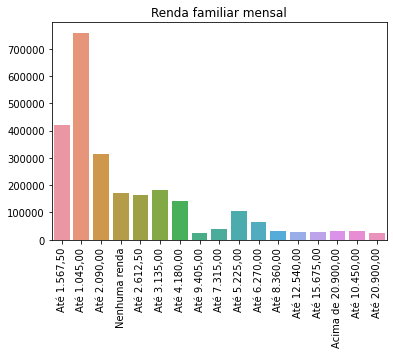

In [32]:
sns.countplot(x = df['Q006'])
plt.title('Renda familiar mensal')
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("")
plt.show()

In [33]:
df[['TP_FAIXA_ETARIA', 'NU_NOTA_MT', 'NU_NOTA_CH']].describe()

,NU_NOTA_MT,NU_NOTA_CH
count,2.588681e+06,2.588681e+06
mean,5.207273e+02,5.142870e+02
std,1.171921e+02,9.496106e+01
min,0.000000e+00,0.000000e+00
25%,4.259000e+02,4.387000e+02
50%,5.053000e+02,5.157000e+02
75%,6.024000e+02,5.834000e+02
max,9.750000e+02,8.626000e+02


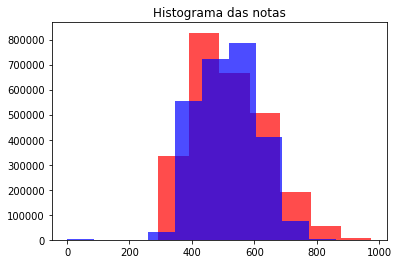

In [34]:
plt.hist(df['NU_NOTA_MT'], alpha=0.7, color='red')
plt.hist(df['NU_NOTA_CH'], alpha=0.7, color='blue')
plt.title('Histograma das notas')
plt.show()

#### A maioria dos inscritos possuem entre 17 a 30 anos.

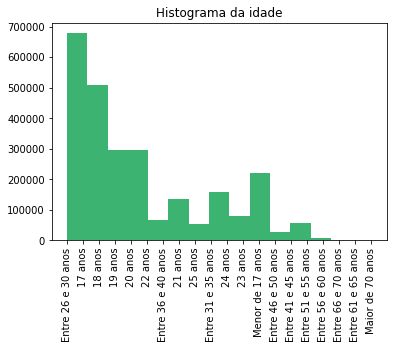

In [35]:
plt.hist(x= df['TP_FAIXA_ETARIA'], bins=15, histtype='bar', color='#3CB371')
plt.title('Histograma da idade')
plt.xticks(rotation=90)
plt.show()

### A partir da faixa de 36 anos as notas em matemática começa a cair.

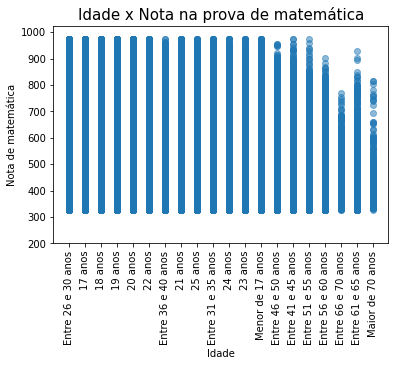

In [36]:
plt.scatter(df['TP_FAIXA_ETARIA'], df['NU_NOTA_MT'], alpha=0.5)
plt.title("Idade x Nota na prova de matemática", size=15)
plt.xticks(rotation=90)
plt.xlabel("Idade")
plt.ylabel("Nota de matemática")
plt.ylim(200) #ignorando as notas = 0
plt.show()

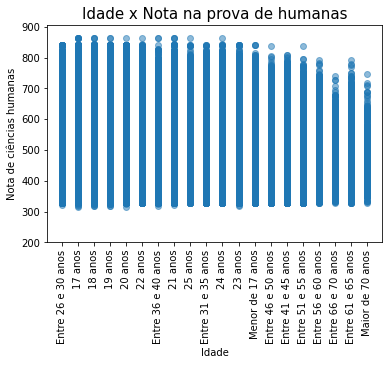

In [37]:
plt.scatter(df['TP_FAIXA_ETARIA'], df['NU_NOTA_CH'], alpha=0.5)
plt.title("Idade x Nota na prova de humanas", size=15)
plt.xticks(rotation=90)
plt.xlabel("Idade")
plt.ylabel("Nota de ciências humanas")
plt.ylim(200) #ignorando as notas = 0
plt.show()

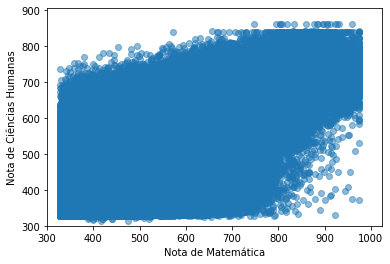

In [38]:
plt.scatter(df['NU_NOTA_MT'], df['NU_NOTA_CH'], alpha=0.5)
plt.xlim(300) #removendo as notas =0
plt.ylim(300) #removendo as notas =0
plt.xlabel("Nota de Matemática")
plt.ylabel("Nota de Ciências Humanas")
plt.show()

#### O sexo masculino possui o melhor desempenho em matemática.

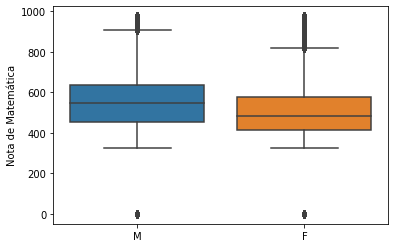

In [39]:
sns.boxplot(x=df['TP_SEXO'], y=df['NU_NOTA_MT'])
plt.xlabel("")
plt.ylabel("Nota de Matemática")
plt.show()

#fazer teste estatistico pra ver se tem diferença significativa entre os sexos

In [40]:
from scipy import stats
from statsmodels.stats import diagnostic

In [41]:
sexo = df[['TP_SEXO', 'NU_NOTA_MT']]
sexo_f = sexo.query('TP_SEXO == "F"').drop('TP_SEXO',axis=1).dropna()
sexo_m = sexo.query('TP_SEXO == "M"').drop('TP_SEXO',axis=1).dropna()
print(sexo_f.shape[0])
print(sexo_m.shape[0])

1564051
1024630


In [42]:
# teste de normalidade: Shapiro-Wilk "p-value may not be accurate for N > 5000."
# teste de normalidade: Lilliefors Test: FALHOU! 
# mas eu imaginava isso pelos gráficos e diferença entre media e mediana

print('sexo_f:',diagnostic.lilliefors(sexo_f))
print('sexo_m:',diagnostic.lilliefors(sexo_m))

sexo_f: (0.07422840754838611, 0.0009999999999998899)
sexo_m: (0.04325717706746768, 0.0009999999999998899)


In [43]:
# Teste U de Mann–Whitney: são estatisticamente diferentes!
stats.mannwhitneyu(sexo_f, sexo_m, alternative='two-sided')

MannwhitneyuResult(statistic=array([6.02866504e+11]), pvalue=array([0.]))

#### A nota de matemática é maior para os candidatos que possuem internet em casa.

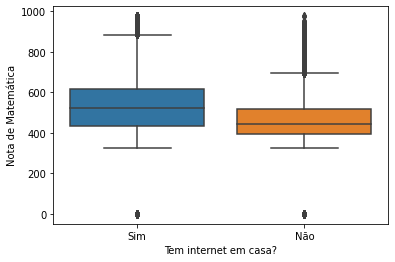

In [44]:
sns.boxplot(x=df['Q025'], y=df['NU_NOTA_MT'])
plt.xlabel("Tem internet em casa?")
plt.ylabel("Nota de Matemática")
plt.show()

In [45]:
internet = df[['Q025', 'NU_NOTA_MT']]
internet_n = internet.query('Q025 == "Não"').drop('Q025',axis=1).dropna()
internet_s = internet.query('Q025 == "Sim"').drop('Q025',axis=1).dropna()
print(internet_n.shape[0])
print(internet_s.shape[0])

410937
2150367


In [46]:
# teste de normalidade: FALHOU!
print('internet_n:',diagnostic.lilliefors(internet_n))
print('internet_s:',diagnostic.lilliefors(internet_s))

internet_n: (0.07745168583882056, 0.0009999999999998899)
internet_s: (0.0553227049859889, 0.0009999999999998899)


In [47]:
# Teste U de Mann–Whitney: são estatisticamente diferentes!
stats.mannwhitneyu(internet_n, internet_s, alternative='two-sided')

MannwhitneyuResult(statistic=array([2.87403334e+11]), pvalue=array([0.]))

In [48]:
#### A nota de mátematica é maior para pessoas brancas.

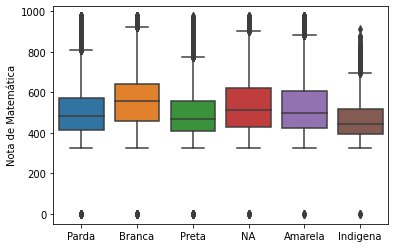

In [49]:
sns.boxplot(x=df['TP_COR_RACA'], y=df['NU_NOTA_MT'])
plt.xlabel("")
plt.ylabel("Nota de Matemática")
plt.show()

In [50]:
raca = df[['TP_COR_RACA', 'NU_NOTA_MT']]
raca_b = raca.query('TP_COR_RACA == "Branca"').drop('TP_COR_RACA',axis=1).dropna()
raca_pa = raca.query('TP_COR_RACA == "Parda"').drop('TP_COR_RACA',axis=1).dropna()
raca_pr = raca.query('TP_COR_RACA == "Preta"').drop('TP_COR_RACA',axis=1).dropna()
raca_a = raca.query('TP_COR_RACA == "Amarela"').drop('TP_COR_RACA',axis=1).dropna()
raca_i = raca.query('TP_COR_RACA == "Indigena"').drop('TP_COR_RACA',axis=1).dropna()

print(raca_b.shape[0])
print(raca_pa.shape[0])
print(raca_pr.shape[0])
print(raca_a.shape[0])
print(raca_i.shape[0]) 

984621
1169331
313315
57449
13965


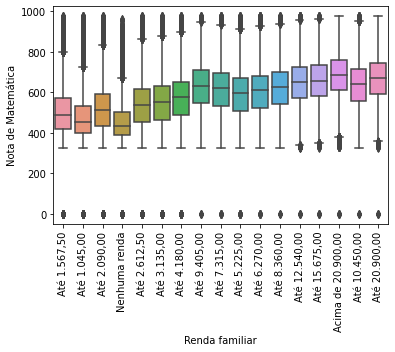

In [51]:
sns.boxplot(x=df['Q006'], y=df['NU_NOTA_MT'])
plt.xticks(rotation=90)
plt.xlabel("Renda familiar")
plt.ylabel("Nota de Matemática")
plt.show()

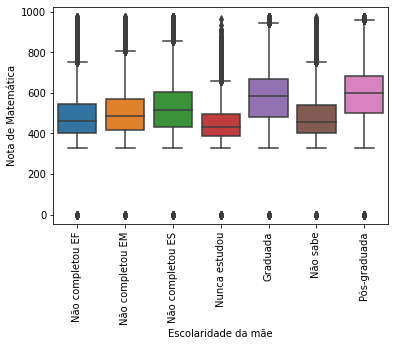

In [52]:
sns.boxplot(x=df['Q002'], y=df['NU_NOTA_MT'])
plt.xticks(rotation=90)
plt.xlabel("Escolaridade da mãe")
plt.ylabel("Nota de Matemática")
plt.show()

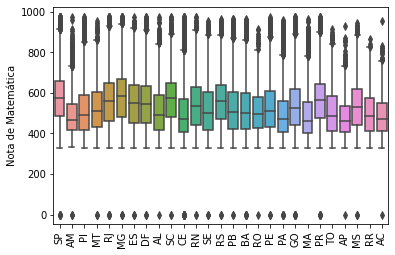

In [53]:
sns.boxplot(x=df['SG_UF_ESC'], y=df['NU_NOTA_MT'])
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("Nota de Matemática")
plt.show()